### t-SNE + DBSCAN
- t-SNE 참고 자료
    - https://yamalab.tistory.com/118
    - https://gaussian37.github.io/ml-concept-t_sne/
    - https://skyeong.net/284

- DBSCAN 참고 자료
    - https://todayisbetterthanyesterday.tistory.com/62https://todayisbetterthanyesterday.tistory.com/62
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 필요한 패키지 임포트

In [ ]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 군집화
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE                                   # 차원 축소
from sklearn.preprocessing import StandardScaler, MinMaxScaler      # 정규화 
from sklearn.cluster import DBSCAN                                  # 비지도 학습 - 클러스터링 ; DBSCAN

# csv 파일 저장
import csv
import time
import datetime

### 데이터 불러오기

In [ ]:
file_path1 = "/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Feature_Result_csv/20220326-141916.csv"                       # 피처값 csv 파일 경로
file_path2 = "/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Feature_Result_csv/20220325-155320.csv"

df_file1 = pd.read_csv(file_path1, index_col=0)
df_file2 = pd.read_csv(file_path2, index_col=0)
df_soundwave = pd.concat([df_file1, df_file2], axis=0)                      # classic 장르 피처값 csv 읽기
df_soundwave.head()

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,blues.00000.wav,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,...,7.422605,1.236302,0.492951,32.866340,-23.219631,1.219928,6.853561,0.534537,0.258880,123.046875
1,blues.00002.wav,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,...,6.828190,0.349044,0.675960,16.524359,-29.785427,-2.226821,5.529573,0.976377,-0.080558,161.499023
2,blues.00003.wav,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,...,6.107267,0.175515,-0.124392,16.595015,-21.426250,-3.408233,5.654808,0.880601,0.255001,172.265625
3,blues.00004.wav,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,...,7.932865,0.378629,-0.042242,4.889854,-41.730530,-11.703781,7.432079,0.651141,-0.701559,135.999178
4,blues.00010.wav,3202.187008,436.072310,1410.469096,453.302918,0.489085,0.669760,6707.592773,516.796875,2767.274933,...,6.872131,0.929898,-0.062250,20.802301,-29.235157,-4.986113,6.826524,1.310209,0.176304,161.499023


### 데이터 전처리

In [ ]:
df_soundwave.duplicated(subset=['song']).sum()  # 중복값 확인

388

In [ ]:
df_soundwave.drop_duplicates(subset=['song'], inplace=True, ignore_index=True)  # 중복값 삭제

In [ ]:
df_soundwave.shape

(1815, 194)

### 정규화 - Standardscaler

In [ ]:
# StandardScaler 객체 생성
#scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
#df_scaler = df_soundwave.iloc[:, 1:]    # song 컬럼 제외하고 표준화 진행
#scaler.fit(df_scaler)                   # 데이터 분포가 정규분포를 만족하도록 모델을 학습
#df_scaled = scaler.transform(df_scaler) # 정규 분포에 따르는 데이터 값을 ndarray 형식으로 받기

# transform( )시 scale 변환된 데이터셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
#columns = df_soundwave.columns[1:]      # 밑에 변환할 때 리스트 값으로 넣어줘야함
#df_sw = pd.DataFrame(data=df_scaled, columns=columns)

In [ ]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
df_scaler = df_soundwave.iloc[:, 1:]    # song 컬럼 제외하고 표준화 진행
scaler.fit(df_scaler)                   # 데이터 범위가 [0, 1]이 되도록 최솟값은 0, 최댓값은 1을 갖도록 모델을 학습
df_scaled = scaler.transform(df_scaler) # [0, 1] 범위에 따르도록 데이터 값을 ndarray 형식으로 받기

# transform( )시 scale 변환된 데이터셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
columns = df_soundwave.columns[1:]      # 밑에 변환할 때 리스트 값으로 넣어줘야함
df_sw = pd.DataFrame(data=df_scaled, columns=columns)

In [ ]:
df_sw       # scaled df

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,0.407791,0.411274,0.340305,0.178090,0.095838,0.319965,0.678728,0.309654,0.396110,0.290803,...,0.207183,0.249651,0.473261,0.456926,0.703116,0.599225,0.205039,0.142799,0.552614,0.487179
1,0.486644,0.167082,0.282566,0.199113,0.188813,0.365319,0.567982,0.074681,0.301127,0.268118,...,0.174392,0.137007,0.532540,0.216103,0.572221,0.501595,0.137707,0.180329,0.471618,0.807692
2,0.309606,0.127623,0.162487,0.219261,0.045523,0.257914,0.675439,0.065574,0.195043,0.386586,...,0.134624,0.114977,0.273295,0.217144,0.738869,0.468131,0.144076,0.172194,0.551688,0.897436
3,0.461247,0.340229,0.353019,0.312238,0.041617,0.263498,0.621711,0.194900,0.368142,0.397652,...,0.235330,0.140763,0.299905,0.044651,0.334085,0.233157,0.234460,0.152703,0.323437,0.595142
4,0.305375,0.174617,0.247214,0.233390,0.026319,0.219553,0.583333,0.087432,0.267244,0.376743,...,0.176816,0.210751,0.293424,0.279145,0.583192,0.423437,0.203664,0.208685,0.532910,0.807692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0.383141,0.536289,0.498225,0.217944,0.019250,0.192846,0.644737,0.520947,0.495840,0.227210,...,0.252271,0.079507,0.360701,0.349439,0.655800,0.586996,0.255089,0.104658,0.546456,0.595142
1811,0.711188,0.295923,0.565562,0.469053,0.057472,0.237674,0.855263,0.147541,0.616147,0.499180,...,0.242328,0.517636,0.731191,0.476053,0.657802,0.537318,0.245554,0.179439,0.506074,0.595142
1812,0.761701,0.578114,0.630299,0.381963,0.104577,0.360728,0.890351,0.453552,0.748305,0.406171,...,0.328870,0.172935,0.455104,0.581075,0.692539,0.656507,0.361113,0.140301,0.651034,0.658120
1813,0.552932,0.342364,0.483942,0.273382,0.071202,0.205028,0.777412,0.224044,0.521280,0.400248,...,0.222216,0.269582,0.093264,0.370606,0.852094,0.679302,0.203853,0.103828,0.569065,0.807692


In [ ]:
# MinMaxScaler 객체 생성
#scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
#df_scaler = df_soundwave.iloc[:, 1:]    # song 컬럼 제외하고 표준화 진행
#scaler.fit(df_scaler)                   # 데이터 범위가 [0, 1]이 되도록 최솟값은 0, 최댓값은 1을 갖도록 모델을 학습
#df_scaled = scaler.transform(df_scaler) # [0, 1] 범위에 따르도록 데이터 값을 ndarray 형식으로 받기

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
#columns = df_soundwave.columns[1:]      # 밑에 변환할 때 리스트 값으로 넣어줘야함
#df_sw = pd.DataFrame(data=df_scaled, columns=columns)

### PCA

In [ ]:
# PCA 로 차원 축소를 먼저 하자....
n_components = 2   
random_state = 2022

pca = PCA(n_components=n_components, random_state=random_state)

X_PCA = pca.fit_transform(df_sw)        
X_PCA = pd.DataFrame(data=X_PCA, index=df_sw.index)

X_PCA_inverse = pca.inverse_transform(X_PCA)
X_PCA_inverse = pd.DataFrame(data=X_PCA_inverse, index=df_sw.index)

In [ ]:
X_PCA

,0,1
0,0.430702,-0.599778
1,0.260578,-0.143721
2,0.487306,0.118469
3,0.520246,0.146921
4,0.189327,0.579609
...,...,...
1810,0.241255,-0.477628
1811,0.140040,0.008194
1812,-0.262778,0.052358
1813,-0.124083,-0.600436


### t-SNE 
- 차원 축소
- 참고 자료
    - https://gaussian37.github.io/ml-concept-t_sne/
    - https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.manifold.tsne

In [ ]:
n_components = 2                # 2차원으로 차원 축소 / n_components : 차원 축소 결과 임베딩되는 차원
learning_rate = 300             # 학습을 할 때 사용하는 learning rate (일반적으로 10~1000 사이의 값)
perplexity = 30                 # 다른 manifold learning의 nearest neighbors 갯수에 사용되는 값 (5~50 사이의 값을 선택 -> 값을 변경해가면서 조정할 필요 있음)
early_exaggeration = 12         # 기존 공간에서 데이터의 클러스터 간 거리가 타겟 공간에서 얼만큼 조밀하거나 먼지 나타내는 파라미터
init = 'random'                     # pca 옵션도 존재 ... 뭔지 더 찾아보자..!!!!!!!!!!!
n_iter = 1000                   # 최적화를 위한 최대 반복 횟수 (최소 250이상이어야 학습하는 데 지장 없음)
#n_iter_without_progress        # 성능 개선 없이 학습이 지속되면 학습을 중지하는 옵션이며 카운트는 50의 배수 단위로 카운트
random_state = 2022             # 

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate,
            perplexity=perplexity, early_exaggeration=early_exaggeration,
            init=init, random_state=random_state)

#tSNE = tSNE.fit_transform(df_soundwave.iloc[:, 1:])
tSNE = tSNE.fit_transform(X_PCA)

tSNE_df = pd.DataFrame(tSNE, columns = ['X', 'Y'])

In [ ]:
tSNE_df

,X,Y
0,9.005294,-29.714918
1,-6.368021,-13.384698
2,-19.667915,-10.930156
3,-20.851219,-11.147053
4,-26.456865,7.582702
...,...,...
1810,6.545359,-21.410345
1811,-7.491323,-3.601217
1812,-0.479787,10.635955
1813,21.461721,-15.229420


### tSNE 결과 시각화

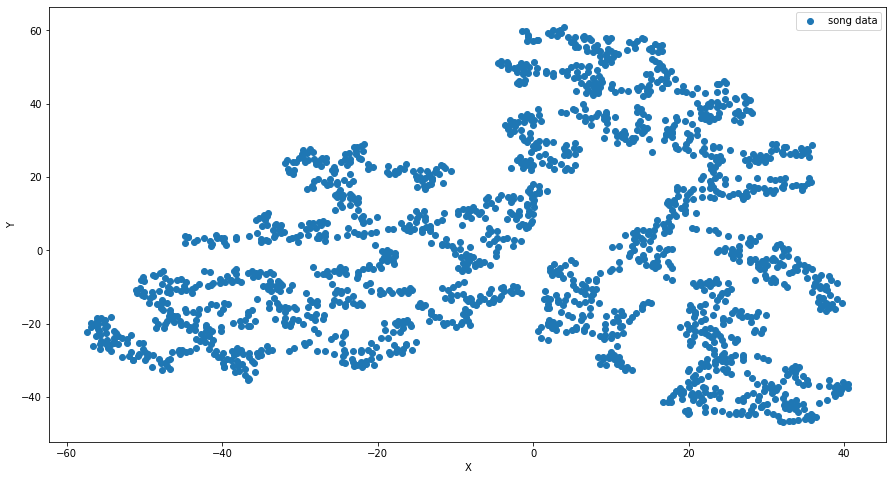

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(tSNE_df.iloc[:,0], tSNE_df.iloc[:,1], label='song data')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

### DBSCAN
- 참고 자료
    - 이론 : https://syj9700.tistory.com/40
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    - https://towardsdatascience.com/understanding-dbscan-and-implementation-with-python-5de75a786f9f


In [ ]:
# create model and prediction
eps = 3
min_samples = 10

# eps : 두 데이터 포인트가 이웃이 되기 위한 조건인 두 포인트 사이의 최대 거리 (매우 중요한 파라미터)
# min_samples : 군집이라고 부르기 위한 최소 샘플 -> 최적의 최소 샘플수 찾아야 함!!!!!
model = DBSCAN(eps=eps, min_samples=min_samples).fit(tSNE_df)

predict = pd.DataFrame(model.fit_predict(tSNE_df))           
predict.columns=['predict']                                 

# concatenate labels to df as a new column
dbscan = pd.concat([df_sw, predict],axis=1)
dbscan_song = pd.concat([df_soundwave['song'], predict],axis=1)

dbscan_song

,song,predict
0,blues.00000.wav,0
1,blues.00002.wav,1
2,blues.00003.wav,2
3,blues.00004.wav,2
4,blues.00010.wav,3
...,...,...
1810,항구의 남자-박상철_30.wav,6
1811,호랑나비-김흥국_30.wav,9
1812,10분 내로-김연자_30.wav,11
1813,사랑의 트위스트-설운도_30.wav,5


In [ ]:
# dbscan.drop(columns=['cluster'], inplace=True)

In [ ]:
# the clustering result of the data
model_labels = model.labels_

np.unique(model_labels, axis=0, return_counts=1)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([ 32,  19,  68,  14, 160, 335, 255, 100,  95,  39,  72, 297,  58,
         70,  34, 167]))

In [ ]:
# 군집별 노래 목록 확인
print(dbscan_song.index[dbscan_song['predict'] == 0].tolist())

[0, 7, 41, 43, 56, 59, 65, 66, 149, 398, 576, 584, 638, 924, 962, 1005, 1265, 1430, 1670]


In [ ]:
# 노래 확인
dbscan_song.iloc[1670]['song']

'찐이야-영탁_30.wav'

> - eps, min_samples 갯수 조절하면서 더욱 정교하게 해보자 :-)

### DBSCAN 시각화
- 아래 코드 참고 사이트:
    - https://jimmy-ai.tistory.com/138
    - 시각화 : https://jimmy-ai.tistory.com/80